In [62]:
using Plots

In [63]:
Nkx = 1000 #kのx方向をNkx分割
Nky = 1000 #kのy方向をNky分割
M = 100 #エネルギーをM分割．つまりM個の階級のヒストグラムを作る．

100

In [64]:
#二次元の分散関係は三次元空間中の曲面として表される．ブリルアンゾーン内の各kの値で曲面の高さを2次元配列にする．

#分散関係
function Ek(kx,ky)
    return -2*(cos(kx)+cos(ky))
end

#波数をブリルアンゾーン内で分割
kxrange = range(-π,π,Nkx)
kyrange = range(-π,π,Nky)

#分散関係を表す二次元配列に値を入れていく．
E = zeros(Float64,Nkx,Nky)

for i in 1:Nkx
    for j in 1:Nky 
        E[i,j] = Ek(kxrange[i],kyrange[j])
    end
end

#println(E)

In [65]:
function count_bins(xmin,xmax,M,A)
    count = zeros(Int64,M)
    delta = (xmax-xmin)/M

    for i in 1:size(A,1)
        for j in 1:size(A,2)
            e = convert(Int64,ceil((A[i,j]-xmin)/delta))
            count[e] += 1
        end
    end

    return count
end

count_bins (generic function with 1 method)

In [66]:
#簡単な配列で関数の挙動を確認する．
A = rand(Float64,5,5)

println(A)
println("$(size(A,1)), $(size(A,2)), $(A[3,4]), $(count_bins(0,1,10,A))")

[0.5407368940833355 0.607634419685127 0.4743875782339365 0.23114150677925382 0.2753518804139016; 0.6301025136705243 0.1748323303336532 0.7015772260921432 0.29169471397178925 0.6177425837071124; 0.9242967390110488 0.0741662461085364 0.4895073062092682 0.8654782356605022 0.35330845514125286; 0.6369612333084989 0.4412909225789784 0.5528440934119484 0.5608291054182241 0.9686293906749495; 0.3905193059905214 0.2808321078017988 0.06722572755287559 0.413308774611568 0.8829620789057498]
5, 5, 0.8654782356605022, [2, 1, 4, 2, 4, 3, 4, 1, 2, 2]


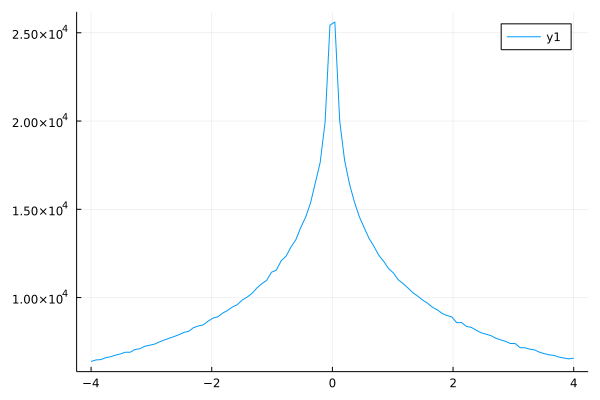

In [70]:
d = range(-4,4,M)

plot(d,count_bins(-4,4,M,E))